<a href="https://colab.research.google.com/github/Dpipeto/AdaBoost/blob/main/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Informe de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1343
           1       0.85      0.94      0.89      1600
           2       0.71      0.55      0.62      1380
           3       0.67      0.65      0.66      1433
           4       0.74      0.58      0.65      1295
           5       0.68      0.59      0.63      1273
           6       0.69      0.82      0.75      1396
           7       0.72      0.70      0.71      1503
           8       0.70      0.69      0.69      1357
           9       0.56      0.70      0.62      1420

    accuracy                           0.72     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.72      0.71     14000



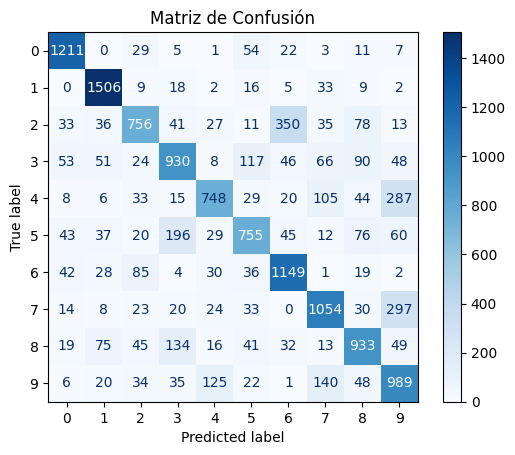

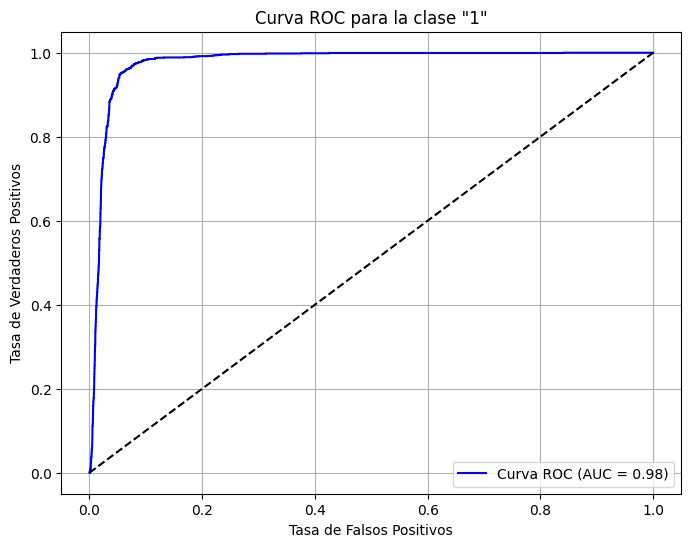

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score


mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


base_classifier = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(estimator=base_classifier, n_estimators=50, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Informe de clasificación:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()


y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve((y_test == 1).astype(int), y_prob)
roc_auc = roc_auc_score((y_test == 1).astype(int), y_prob)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para la clase "1"')
plt.legend(loc='lower right')
plt.grid()
plt.show()

